In [375]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections
import itertools


In [376]:
def rename_columns(df, col_key):
    df.rename(columns = col_key , inplace = True)
    return df

In [377]:
def comp_hist(df, col):
    bin_range =[df[col].min(), df[col].max()]
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(df.loc[df['donated']==0][col], 
                               bins = 10, 
                               range = bin_range, 
                               alpha = 0.5, 
                               label = "Did not donate" )
    ax.hist(df.loc[df['donated']==1][col], 
            bins = bins, 
            alpha = 0.5,
            label = "Donated")
    ax.set_title(col)
    ax.legend()
    fig.show()
    

In [378]:

df = pd.read_csv("data/train.csv")

In [379]:
df = rename_columns(df, col_key)
X_cols = df.columns[:-1]
y_col = df.columns[-1]

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
id                    576 non-null int64
months_since_last     576 non-null int64
num_donations         576 non-null int64
total_vol_donated     576 non-null int64
months_since_first    576 non-null int64
donated               576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [381]:
df.head()

,id,months_since_last,num_donations,total_vol_donated,months_since_first,donated
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [382]:
df['donated'].value_counts()/len(df)

0    0.760417
1    0.239583
Name: donated, dtype: float64

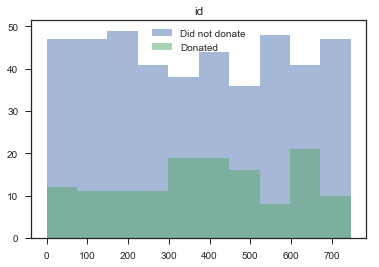

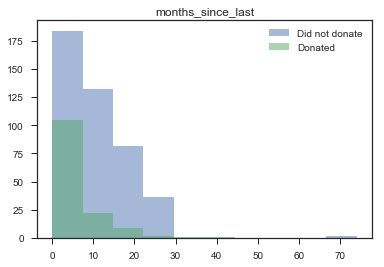

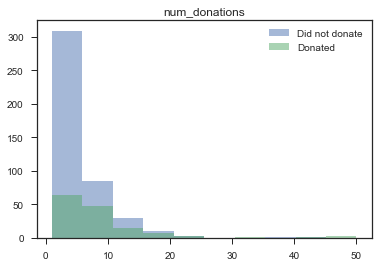

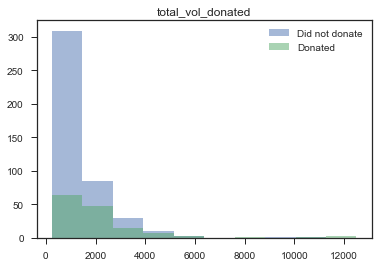

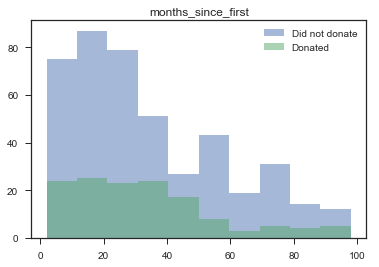

In [383]:
for col in X_cols:
    comp_hist(df, col)


In [384]:
df.corr()

,id,months_since_last,num_donations,total_vol_donated,months_since_first,donated
id,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
months_since_last,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
num_donations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
total_vol_donated,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
months_since_first,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
donated,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


In [385]:
#Drop total vol donated because directly proportional to num_domations
df.drop(columns = ['total_vol_donated'], axis = 1, inplace = True)

In [419]:
df[['months_since_last', 'months_since_first', 'month_ratio', 'donated']]
df.groupby('donated')['month_ratio'].mean()

donated
0    0.483443
1    0.295989
Name: month_ratio, dtype: float64

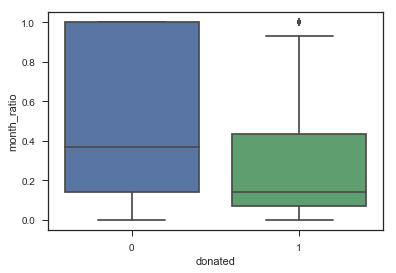

In [431]:
sns.boxplot(x='donated', y='month_ratio', data = df)

In [418]:
#Add frequency (donations in active period)
df['frequency'] = df['num_donations']/(1+df['months_since_first']-df['months_since_last'])
#Add month ratio-- smaller = wider active range, 
df['month_ratio'] = (df['months_since_last'])/(df['months_since_first'])

In [ ]:
sns.boxplot(x='donated', y='frequency', data = df)

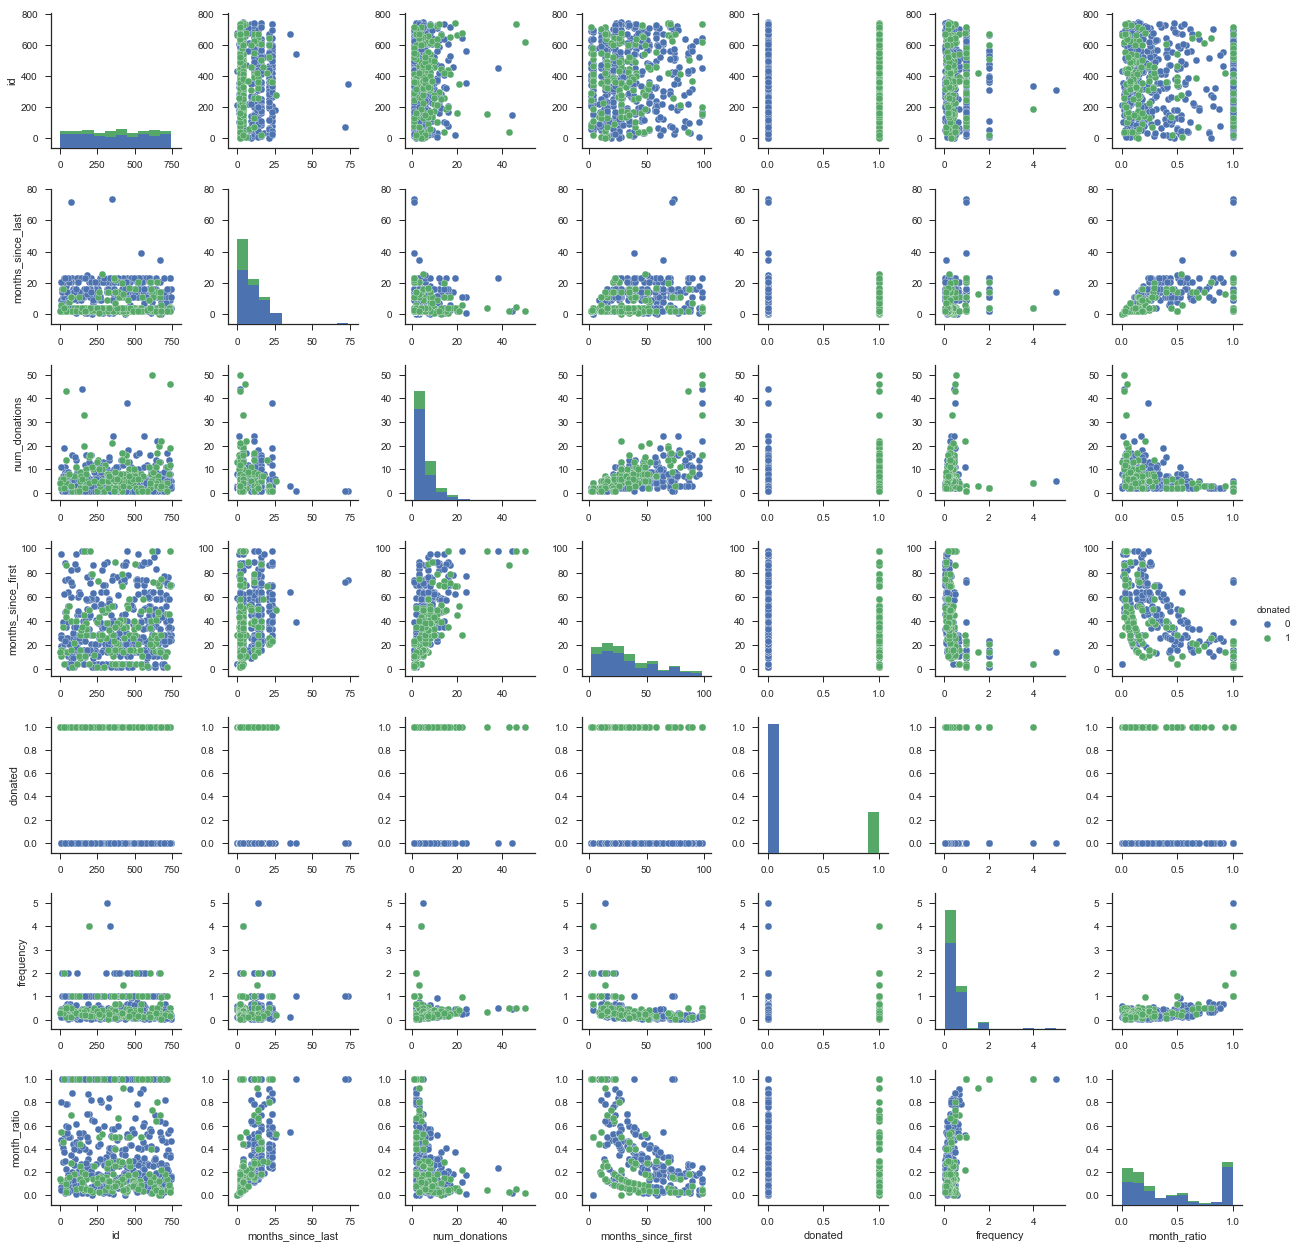

In [412]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="donated")

Dropped total volume because directly propotional to num_donations


In [426]:
df[df['frequency']>1]
#this group is weird because you shouldn't be able to donate more than twice a month

,id,months_since_last,num_donations,months_since_first,donated,frequency,month_ratio
5,335,4,4,4,0,4.0,1.000000
40,391,2,2,2,0,2.0,1.000000
41,471,2,2,2,0,2.0,1.000000
42,377,2,2,2,0,2.0,1.000000
72,546,4,2,4,0,2.0,1.000000
73,54,4,2,4,0,2.0,1.000000
75,510,4,2,4,1,2.0,1.000000
76,311,4,2,4,0,2.0,1.000000
77,476,4,2,4,0,2.0,1.000000
194,555,11,2,11,0,2.0,1.000000
